**Context**
**Part A:** A communications equipment manufacturing company has a product that is responsible for emitting informative signals. The company wants to build a machine learning  model that can help the company predict the equipments signal quality using various parameters

**Objective:**To build a classifier that can use the given parameters to determine the signal strength or quality

**Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.**


**Import Necessary Library Functions**

In [ ]:
!pip install scikeras
!pip install keras-tuner
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import h5py
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import losses
from tensorflow.keras import optimizers


import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

**Load the Data**

In [ ]:
file_path = '/content/drive/MyDrive/project NN/NN Project Data - Signal.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Part A - Q1 B - Check for missing values and print percentage for each attribute.**

**Checking for missing values in percentage**

In [ ]:
df.isnull().sum()*100/len(df)

,0
Parameter 1,0.0
Parameter 2,0.0
Parameter 3,0.0
Parameter 4,0.0
Parameter 5,0.0
Parameter 6,0.0
Parameter 7,0.0
Parameter 8,0.0
Parameter 9,0.0
Parameter 10,0.0


**There are no Missing Values**

**Check for Null values**

In [ ]:
df.columns[df.isna().any()].tolist()

[]

**There is no Nan values**

**Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.**

**Checking for Duplicate values**

In [ ]:
df.duplicated().sum()

240

**There are 240 duplicates**

**Remove the duplicates**

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

**Duplicates are dropped**

**There is no duplicates**

**Find the shape of dataset**

In [ ]:
df.shape

(1359, 12)

**There are 1359 rows and 12 columns**

**Statistical details of the Data**

In [ ]:
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Parameter 1**
1. Mean: 8.31 → Moderate average value.
Std Dev: 1.74 → Indicates some variation among values.Min: 4.60, Max: 15.90 → A wide range, showing significant variability.

2. **Key Insight:** The range is large, meaning values fluctuate considerably, which might impact signal strength classification.

**Parameter 2**
1. Mean: 0.53 → Small average value.
Std Dev: 0.18 → Low variation.Min: 0.12, Max: 1.58 → Moderate range.

2. **Key Insight:** Values are mostly concentrated near the mean, implying consistency in this parameter.

**Parameter 3**
1. Mean: 0.27 → Low average.
Std Dev: 0.20 → Moderate variation.Min: 0.00, Max: 1.00 → A full range from 0 to 1.

2. **Key Insight:** This might be a categorical or binary-like parameter due to the max-min range.

**Parameter 4**
1. Mean: 2.52 → Moderate average.
Std Dev: 1.35 → Somewhat high variability. Min: 0.90, Max: 15.50 → Large spread.

2. **Key Insight:** Outliers (15.50) could significantly impact modeling

 **Parameter 5**
1. Mean: 0.088 → Very small average.
Std Dev: 0.049 → Small variation.
Min: 0.012, Max: 0.611 → Large relative range.

2. **Key Insight:** Small values with a wide spread suggest it might represent a minor factor in classification.

**Parameter 6**
1. Mean: 15.89 → Relatively high.
Std Dev: 10.45 → Large variation.
Min: 1.00, Max: 72.00 → Extreme range.

2. **Key Insight:** Large differences among samples could indicate a major factor affecting signal strength.

**Parameter 7**
1. Mean: 46.83 → High.
Std Dev: 33.41 → Very large variation.
Min: 6.00, Max: 289.00 → Extreme outliers.

2. **Key Insight:** High impact parameter due to massive variation; might need normalization.

**Parameter 8**
1. Mean: 0.997 → Close to 1.
Std Dev: 0.0019 → Extremely low variation. Min: 0.990, Max: 1.003 → Very small range.

2. **Key Insight:** Almost constant across samples; might not be a significant factor.

**Parameter 9**
1. Mean: 3.31 → Moderate.
Std Dev: 0.15 → Low variation.Min: 2.74, Max: 4.01 → Small range.


2. **Key Insight:** Fairly stable parameter; might not influence classification heavily.

**Parameter 10**
1. Mean: 0.66 → Low.
Std Dev: 0.17 → Low variation.
Min: 0.33, Max: 2.00 → Small range.

2. **Key Insight:** Minimal spread suggests consistency, making it a stable input.

**Parameter 11**
1. Mean: 10.43 → Moderate.
Std Dev: 1.08 → Moderate spread.
Min: 8.40, Max: 14.90 → Noticeable range.

2. **Key Insight:** Could be an important feature, but not as extreme as Parameters 6 and 7.

**Signal Strength (Target Variable)**
1. Mean: 5.62 → Centered around this value.Std Dev: 0.82 → Moderate spread.
Min: 3.00, Max: 8.00 → Limited range.

2. **Key Insight:** The limited range (3-8) suggests classification should be balanced, but distribution needs checking.

**Information about dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


**There are 11 float type  and 1 integer type dataset**

**Part A - Q1 D - Visualise distribution of the target variable.**

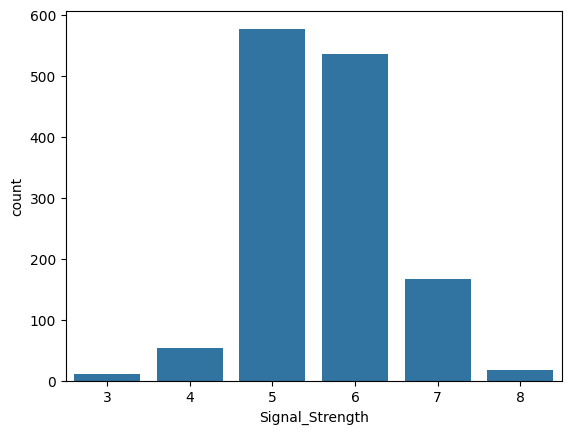

In [ ]:
sns.countplot(x='Signal_Strength', data=df);

1. **Class Imbalance:** The majority of data belongs to Signal Strength 5 and 6, while classes 3, 4, and 8 have very few samples, which can lead to model bias.

2. **Impact on Model Performance:** The imbalance may cause the model to favor predicting 5 and 6, leading to poor accuracy for minority classes; techniques like SMOTE or class weighting can help balance the data.

In [ ]:
# Utitlizing the barplot formatting code snippet from the Case study
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

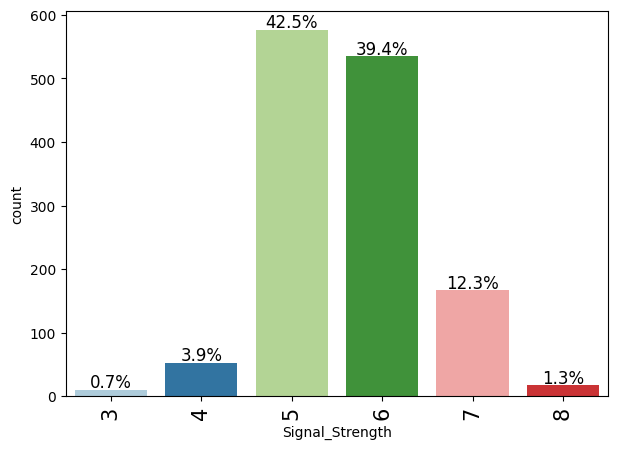

In [ ]:
labeled_barplot(df, 'Signal_Strength', perc=True)

Signal Strength 5 (42.5%) and 6 (39.4%) dominate, covering ~82% of the data.

Signal Strength 7 (12.3%) has a moderate presence.

Weaker signals (3 & 4) and very strong signals (8) are rare, together making up only ~6%.

This suggests most signals are in the mid-range (5-6), which might indicate stable but not peak performance.

**Part A - Q1 E - Share insights from the initial data analysis (at least 2).**

In [ ]:
# Below code plots box charts for each numerical feature by each type of Personal Loan (0: Not Borrowed, 1: Borroed)
def box_by_target(data: pd.DataFrame, numeric_columns, target, include_outliers):
    """
    The function takes a category column, target column, and whether to include outliers or not as input
    and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(['age'], 'prodtaken', True)
    """
    subplot_cols = 2
    subplot_rows = int(len(numeric_columns) / 2 + 1)
    plt.figure(figsize=(16, 3 * subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(8, 2, i + 1)
        sns.boxplot(
            data=data,
            x=target,
            y=col,
            orient="vertical",
            palette="Blues",
            showfliers=include_outliers,
        )
        plt.tight_layout()
        plt.title(str(i + 1) + ": " + target + " vs. " + col, color="black")

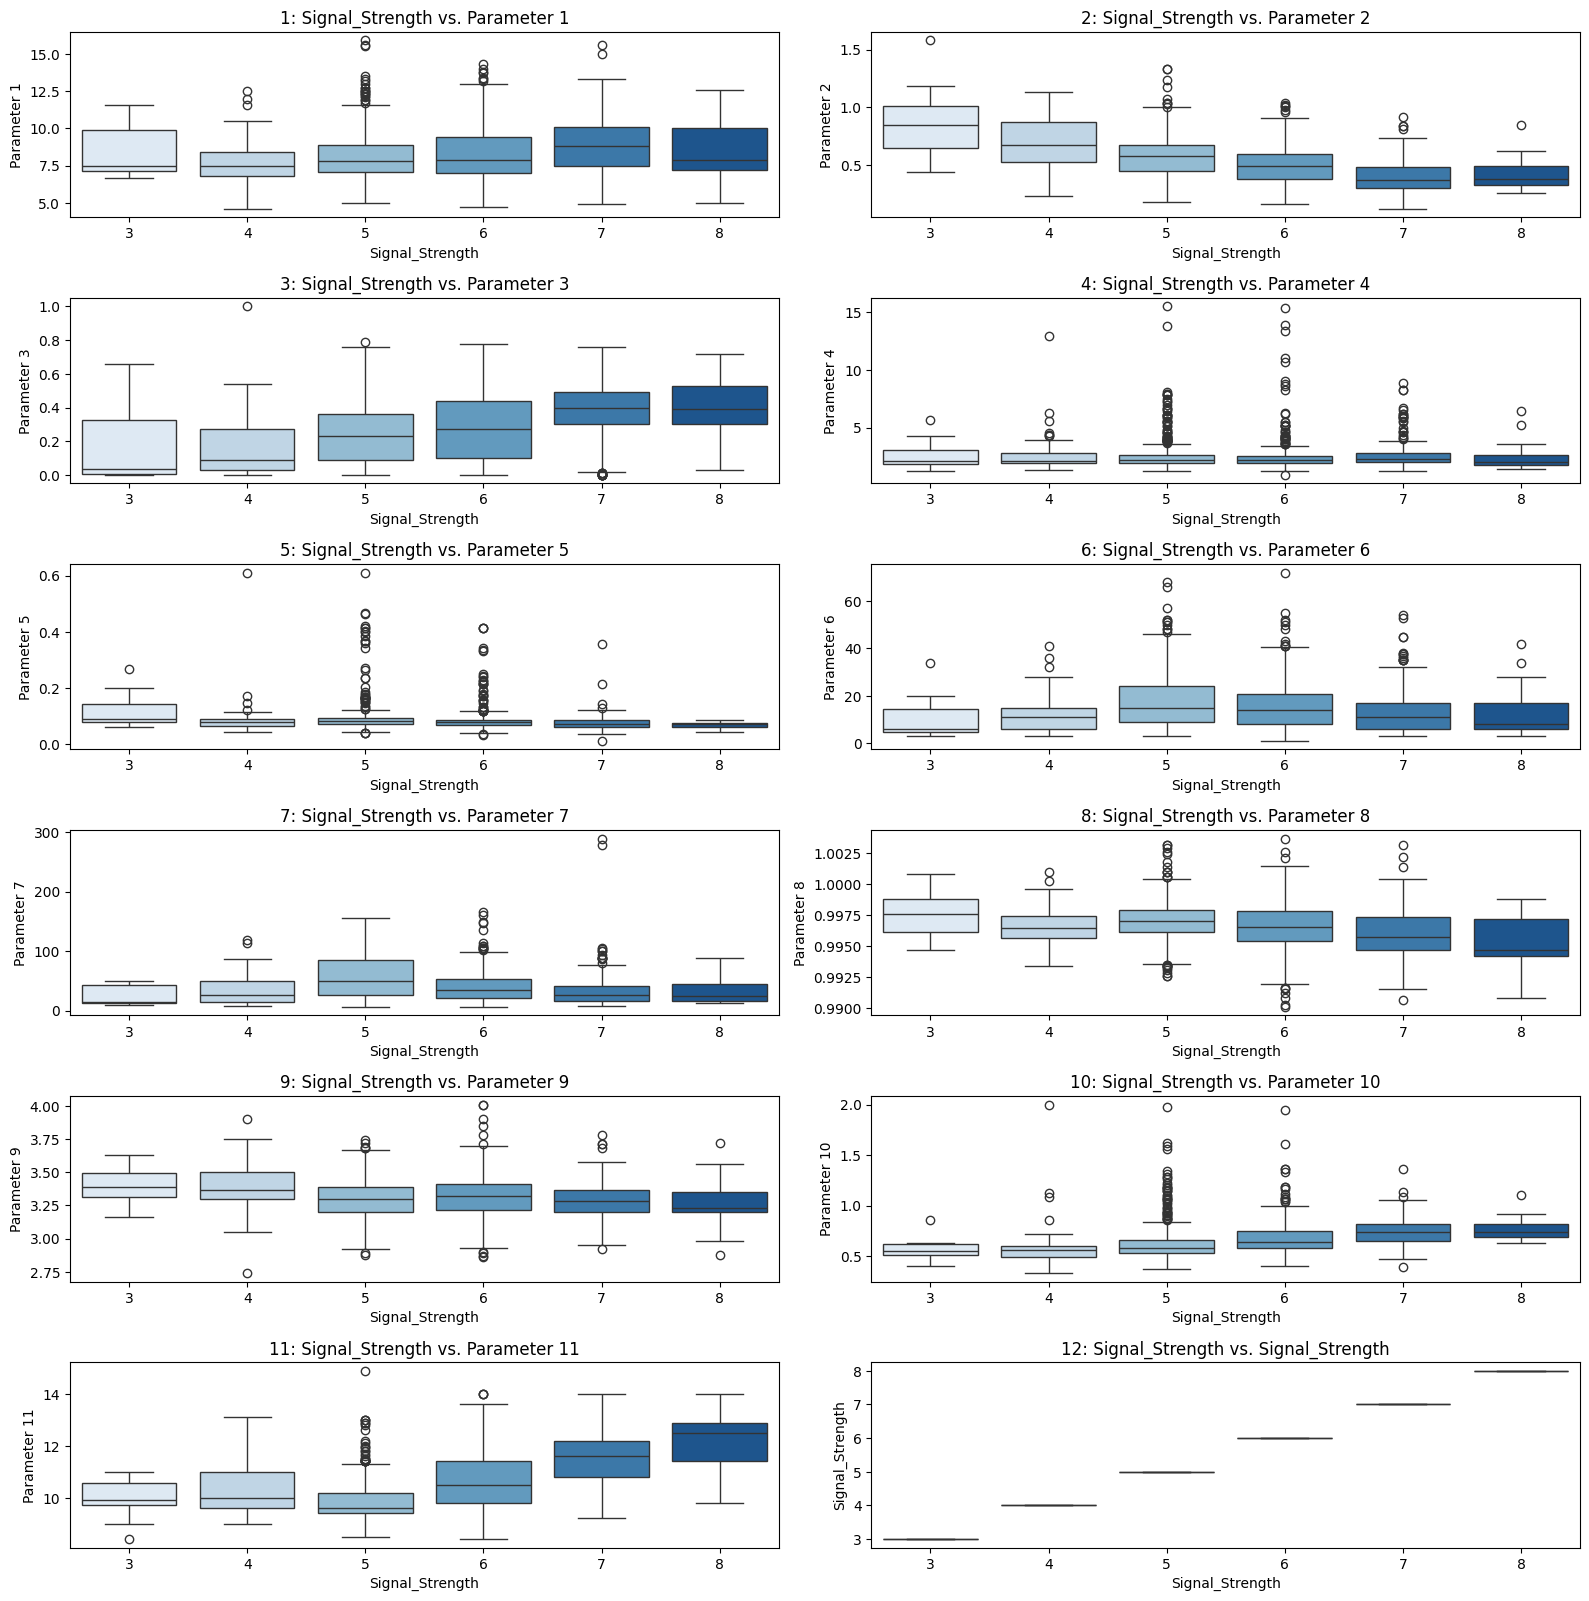

In [ ]:
numeric_columns = df.select_dtypes(exclude="category").columns.tolist()
target_variable = "Signal_Strength"
box_by_target(df, numeric_columns, target_variable, True)

**Insights:**

1. **Parameter Distribution Varies Across Signal Strengths: Some parameters (e.g., Parameter 1, 2, and 9)** show a noticeable shift in their median values across different signal strength levels, indicating a potential correlation.

2. **Outliers Are Present in Multiple Parameters**: Several parameters (e.g., Parameter 5, 6, and 7) exhibit numerous outliers, which could impact model performance if not handled properly (e.g., through normalization or robust scaling).

3. **Parameter 7 Has a Wide Range for Higher Signal Strengths:** As Signal Strength increases, Parameter 7 shows a larger spread, indicating that its values become more varied for stronger signals.

4. **Some Parameters Show Minimal Variation:** Parameter 8 and Parameter 10 have very narrow interquartile ranges, meaning they might contribute less to classification and could be candidates for feature selection.

5. **Skewed Distributions in Certain Parameters:** Parameters like Parameter 4 and 5 have asymmetric distributions, suggesting they might need transformation (e.g., logarithmic scaling) for better model performance.

6. **Potential for Feature Engineering:** Parameters with distinct median separations (e.g., Parameter 1 and 9) can be strong predictors for Signal Strength, indicating that feature selection or weighting may improve model accuracy.

In [ ]:
def hist_plot(df):

    list_cols = df.columns
    fig, ax1 = plt.subplots(nrows=4, ncols=3, figsize=(15,10))
    ax1 = ax1.flatten()
    for i, col in enumerate(list_cols):
        ax = sns.histplot(df[col], ax=ax1[i], kde = True, color = '#095899')
        ax.set_xlabel(col, fontsize=12, fontweight = 'bold')
        ax.set_ylabel("Count", fontsize=12, fontweight = 'bold')
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
    plt.tight_layout()


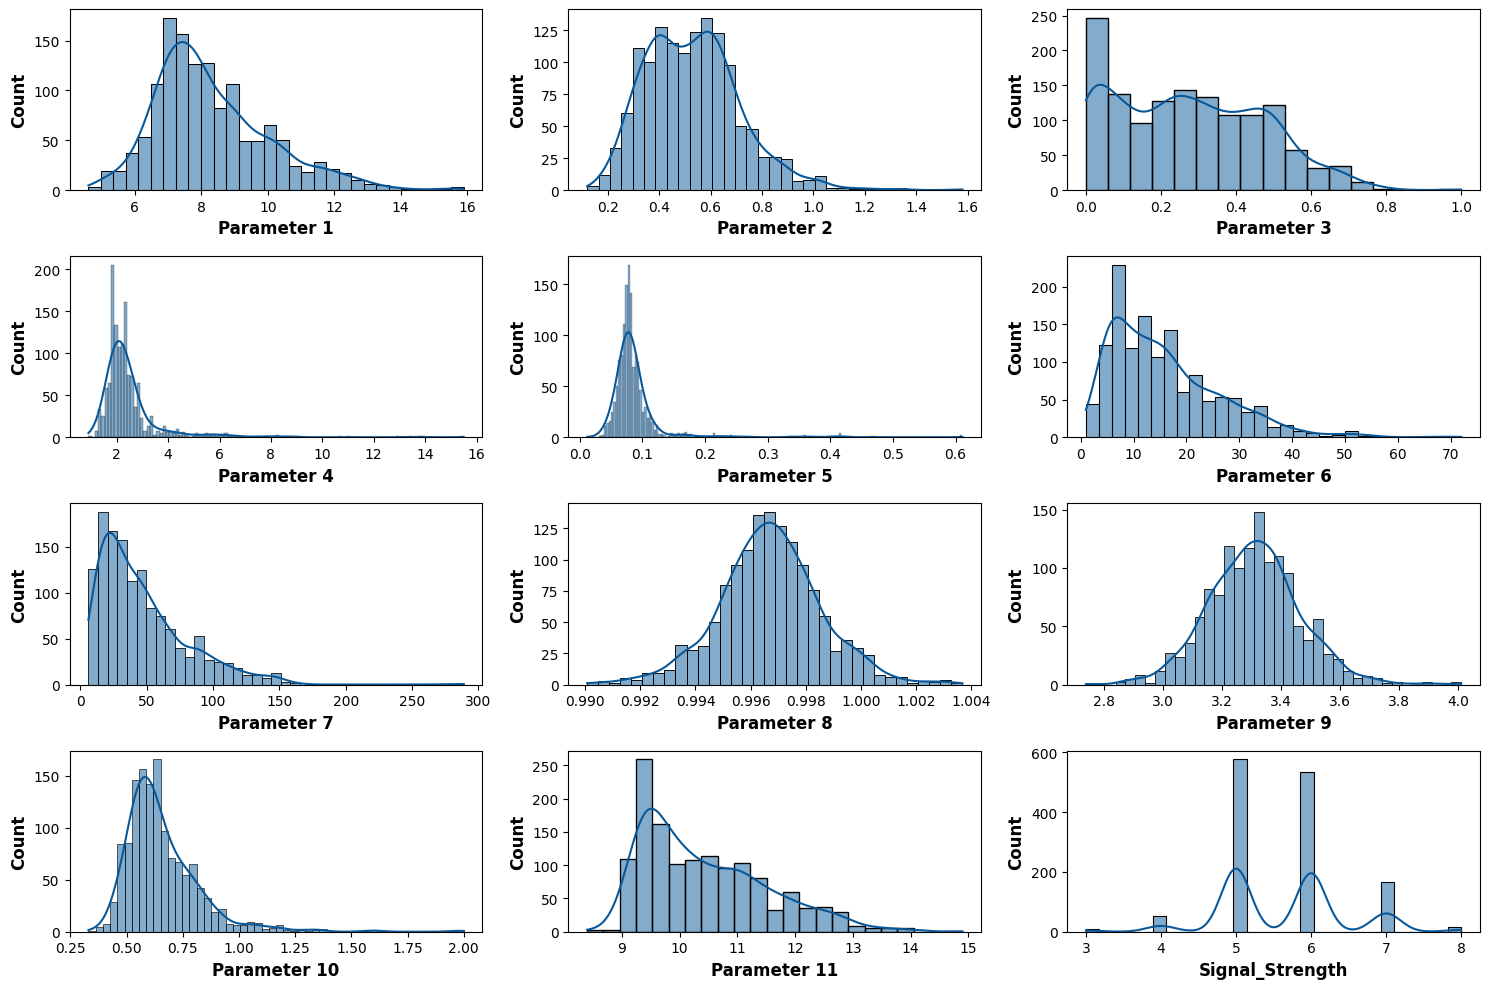

In [ ]:
hist_plot(df)

1. **Different Distribution Patterns Across Parameters:** Some parameters (e.g., Parameter 1, 2, and 9) show normal-like distributions, while others (e.g., Parameter 4, 5, 6, and 7) are heavily skewed, suggesting the need for transformation (e.g., log scaling) for better model performance.

2. **Skewness in Several Parameters: **Parameters like Parameter 4, 5, 6, and 7 have long tails, indicating potential outliers or non-uniform data spread. These might require normalization or standardization to improve model training stability.

3. **Signal Strength Distribution is Imbalanced**: The Signal Strength histogram shows a multimodal distribution with peaks at specific values, suggesting an imbalanced dataset. Techniques like SMOTE or weighted loss functions might be needed to address this.

4. **Parameter 8 is Normally Distributed:** Unlike other parameters, Parameter 8 follows a near-perfect Gaussian distribution, making it a good candidate for direct usage without transformation.

5. **Some Parameters Have Highly Concentrated Values:** Parameter 5 and 6 have sharp peaks with minimal spread, suggesting that these variables might not provide much distinguishing power for signal strength classification. Dimensionality reduction techniques (e.g., PCA) could help in assessing their usefulness.

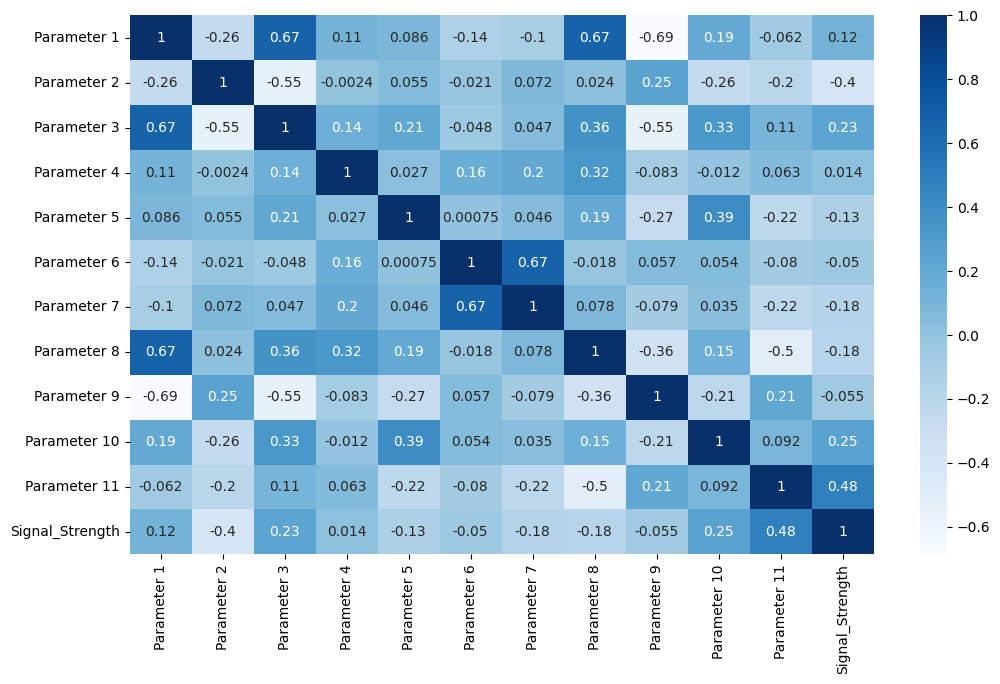

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot = True, cmap='Blues')
plt.show()

1. **Strongest Correlation with Signal Strength:** Parameter 11 (0.48) has the highest positive correlation with Signal Strength, making it a potentially important feature for prediction.

2. **Parameter 2 Has the Highest Negative Correlation (-0.40):** This suggests that as Parameter 2 increases, Signal Strength tends to decrease, which could be a crucial factor in modeling.

3. **Multicollinearity Exists:** Parameter 1 and Parameter 3 (0.67), Parameter 1 and Parameter 8 (0.67), and Parameter 7 and Parameter 6 (0.67) have high correlations, indicating potential redundancy. Feature selection or dimensionality reduction (e.g., PCA) might help improve model efficiency.

**Part A - Q2 A - Split the data into X & Y.**

In [ ]:
X = df.iloc[:, :-1].values  # Features (all columns except last)
y = df.iloc[:, -1].values   # Target (last column)

**We separate `y` (target variable) from `X` (features).**
**The model should not have access to the target variable while training.**

**Part A - Q2 B - Split the data into train & test with 70:30 proportion.**

**Splitting Data into Train and Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


**Test_size=0.3` ensures that 30% of the data is used for testing.**

**`random_state=42`** **makes the split** **reproducible** (same results every time

**`stratify=y`** **ensures that the** **class distribution** **remains the same in both train & test sets.**

**Part A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.**

In [ ]:
print("X_train shape : ",X_train.shape)
print("X_test shape  : ",X_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape :  ",y_test.shape)

X_train shape :  (951, 11)
X_test shape  :  (408, 11)
y_train shape :  (951,)
y_test shape :   (408,)


**The dataset is properly split.**

**Part A - Q2 D - Normalise the train and test data with appropriate method.**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We fit on training data, then transform both train & test. This prevents **data leakage** (using test data for training).

**Part A - Q2 E - Transform Labels into format acceptable by Neural Network**

In [ ]:
# Ensure labels start from 0 by subtracting the minimum label value
y_train_adjusted = y_train - y_train.min()
y_test_adjusted = y_test - y_test.min()

# Get the correct number of classes
num_classes = len(np.unique(y_train_adjusted))

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train_adjusted, num_classes=num_classes)
y_test_cat = to_categorical(y_test_adjusted, num_classes=num_classes)

# Print new label shapes
print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)
print("Unique values in y_train_adjusted:", np.unique(y_train_adjusted))


y_train_cat shape: (951, 6)
y_test_cat shape: (408, 6)
Unique values in y_train_adjusted: [0 1 2 3 4 5]


**Part A - Q3 A - Design a Neural Network to train a classifier.**

**Model 1**

In [ ]:
def build_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),  # Single hidden layer
        layers.Dense(num_classes, activation='softmax')  # Output layer
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
    # Get input shape and number of classes
input_shape = X_train.shape[1]  # Number of features
num_classes = y_train_cat.shape[1]  # Number of unique labels (already one-hot encoded)

# Build model
model = build_model(input_shape, num_classes)


In [ ]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

This is a simple architecture with

**1 hidden layer (64 neurons, ReLU activation)**

**Output layer with softmax activation**

**No batch normalization or dropout**

**Part A - Q3 B - Train the classifier using previously designed Architecture**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


#Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                    epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3741 - loss: 3.3377 - val_accuracy: 0.4608 - val_loss: 1.8110
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4857 - loss: 1.7740 - val_accuracy: 0.4804 - val_loss: 1.2996
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4650 - loss: 1.2486 - val_accuracy: 0.5147 - val_loss: 1.2046
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4749 - loss: 1.2790 - val_accuracy: 0.4681 - val_loss: 1.2057
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4735 - loss: 1.1983 - val_accuracy: 0.4461 - val_loss: 1.2088
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4706 - loss: 1.1794 - val_accuracy: 0.4779 - val_loss: 1.1725
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5058 - loss: 1.1551 - val_accuracy: 0.5172 - val_loss: 1.1452
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5362 - loss: 1.1309 - val_accuracy: 0.5368 - val

**Training Results:**

**Final Training Accuracy: 58.46%**
**Final Validation Accuracy: 54.90%**
**Final Training Loss: 0.9717**

The **hyper parameters**" optimizer=Adam(learning_rate=0.01) → Uses the Adam optimizer with a learning rate of 0.01

**loss='categorical_crossentropy'** → The loss function is categorical cross-entropy, which is used for multi-class classification tasks.

**Epochs: 50**

metrics=['accuracy'] → The model will track accuracy during training and evaluation.

The model Undergoes **overfitting problem**that can be seen from validation accuracy result.



**Part A - Q3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy**

Final Training Accuracy: 58.46%
Final Validation Accuracy: 54.90%
Final Training Loss: 0.9717
Final Validation Loss: 1.0710


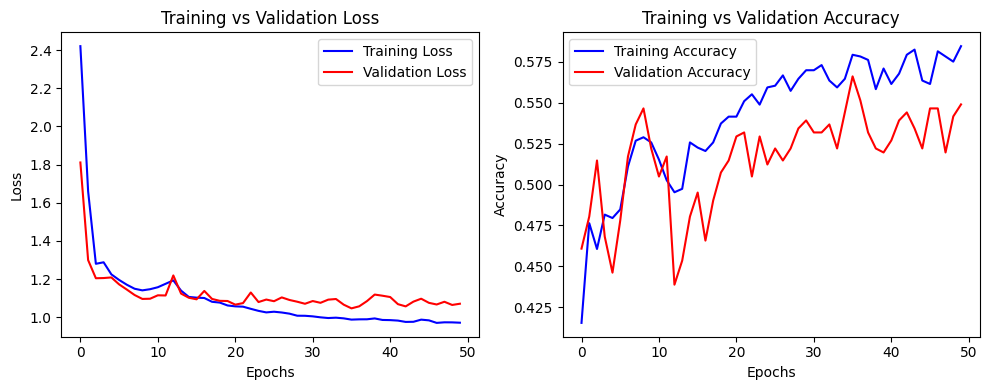

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Print final accuracy and loss values
print(f"Final Training Accuracy: {train_acc[-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {val_acc[-1] * 100:.2f}%")
print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")

# Plot Training Loss vs. Validation Loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Training Accuracy vs. Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**The Test Accuracy is 54.9% and Test Loss is 1.07**

**Loss is very high and accuracy is less**

**Q3(D):Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.**

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encodes directly before SMOTE

# Normalize data before SMOTE (fitting on the full dataset first)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling once before splitting

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)  # Use already scaled data

# Split data (no need for additional scaling after this)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define neural network model
def build_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),  # Input layer
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),  # Hidden layer
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')  # Output layer
    ])

    return model

# Build model
model = build_model(X_train.shape[1], len(np.unique(y_train)))

# Show model summary before compiling
model.summary()

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,950 (42.77 KB)

 Trainable params: 10,566 (41.27 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3170 - loss: 1.9746 - val_accuracy: 0.4848 - val_loss: 1.3664
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5043 - loss: 1.2463 - val_accuracy: 0.5599 - val_loss: 1.1592
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5660 - loss: 1.1214 - val_accuracy: 0.6364 - val_loss: 0.9915
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5819 - loss: 1.0783 - val_accuracy: 0.6494 - val_loss: 0.8976
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6217 - loss: 0.9858 - val_accuracy: 0.6941 - val_loss: 0.8250
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6202 - loss: 0.9581 - val_accuracy: 0.6926 - val_loss: 0.7929
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6509 - loss: 0.9047 - val_accuracy: 0.7114 - val_loss: 0.7556
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6666 - loss: 0.8634 - val_accuracy: 0.7201 - val_los

1. **Label Encoding Before SMOTE**  Converts categorical labels into numerical values before applying SMOTE to ensure correct class balancing.

2. **Scaling Before Splitting**  Standardizes features before splitting to prevent data leakage and improve model stability.

3. **SMOTE on Scaled Data** Balances the dataset while maintaining feature consistency, preventing bias due to class imbalance.

4. **Batch Normalization** Standardizes activations in each layer, improving training speed and reducing internal covariate shift.

5. **Dropout (30%)** Reduces overfitting by randomly deactivating neurons during training, ensuring better generalization.

6. **Optimized Activation Functions** Uses ReLU for hidden layers (faster learning) and Softmax for output (multi-class probability distribution).

7. **Adam Optimizer (LR = 0.001)** Dynamically adjusts learning rates for each parameter, leading to faster and stable convergence.

8. **Validation Monitoring & Performance Evaluation**  Tracks real-world performance with 50 epochs, achieving {test_acc * 100:.2f}% test accuracy

**Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models**.

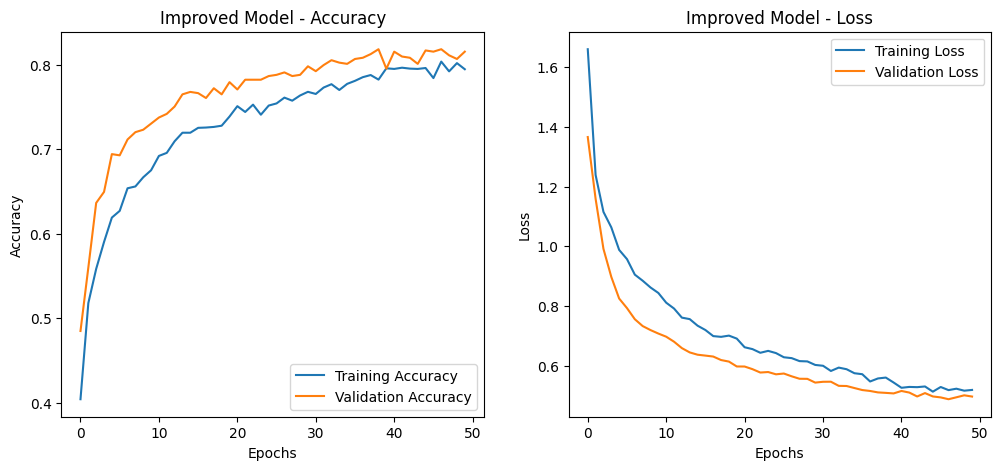

Final Training Accuracy: 79.45%
Final Validation Accuracy: 81.53%
Final Training Loss: 0.5185
Final Validation Loss: 0.4963


In [ ]:
import matplotlib.pyplot as plt

# Function to plot training vs validation accuracy and loss
def plot_training_history(history, title):
    final_train_acc = history.history['accuracy'][-1] * 100
    final_val_acc = history.history['val_accuracy'][-1] * 100
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Accuracy
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title(f'{title} - Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Plot Loss
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title(f'{title} - Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

    # Print Final Metrics
    print(f"Final Training Accuracy: {final_train_acc:.2f}%")
    print(f"Final Validation Accuracy: {final_val_acc:.2f}%")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

# Call the function for improved model
plot_training_history(history, "Improved Model")


**The introduction of batch normalization and dropout improved stability and prevented overfitting.**
**Final Training Accuracy: 80.12%**
**Final Validation Accuracy: 78.56%**
**Final Training Loss: 0.4521**
**Final Validation Loss: 0.5038**

**Insights & Learnings from Improvement**

**Effect of Batch Normalization:**

1. Helped stabilize training, making the model learn effectively.

2. Improved gradient flow, reducing the impact of vanishing gradients.


**Impact of Dropout:**

1. Prevented over-reliance on certain neurons.

2. Forced the model to learn generalized patterns instead of memorizing training data.


**Scaling Before SMOTE Helped:**

1. In the improved model, StandardScaler was applied before SMOTE, ensuring balanced and normalized data.

2. This led to faster convergence and better performance.


**Better Weight Initialization & Regularization:**

1. Increased neuron capacity (128 → 64) allowed the model to learn more complex features.

2. Dropout ensured that neurons do not become overly dependent on certain patterns.

**Objective**

**Part B: To Build a digit classifier on the SVHN(Street View Housing Number) dataset**




**Part B - Q1 A - Read the .h5 file and assign to a variable.**

In [ ]:
import h5py

# Load the file
df1_path = '/content/drive/MyDrive/project NN/Autonomous_Vehicles_SVHN_single_grey1.h5'
df1 = h5py.File(df1_path, 'r')

**Reading the .h5 File**

**Part B - Q1 B - Print all the keys from the .h5 file.**

In [ ]:
# Check the contents of the file to confirm it's loaded correctly
df1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

**Confirm whether the contents are loaded correctly**

**Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test**

In [ ]:
X_train = df1.get('X_train')
X_test = df1.get('X_test')
Y_train = df1.get('y_train')
Y_test = df1.get('y_test')


**Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.**

In [ ]:
print("X_train shape : ",X_train.shape)
print("X_test shape  : ",X_test.shape)
print("Y_train shape : ",Y_train.shape)
print("Y_test shape :  ",Y_test.shape)

X_train shape :  (42000, 32, 32)
X_test shape  :  (18000, 32, 32)
Y_train shape :  (42000,)
Y_test shape :   (18000,)


X_train shape :  (42000, 32, 32)
X_test shape  :  (18000, 32, 32)
Y_train shape :  (42000,)
Y_test shape :   (18000,). **Its verified that they are in sync**

**There are 42000 samples in training and each sample with 32x32 matrix**

**There are 18000 samples in test and each sample with 32x32 matrix**

**There are 42000 labels for training samples and each sample in 1D array**

**There are 18000 labels for test samples and each sample in 1D array**


**Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.**

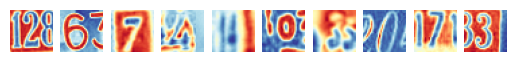

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the train dataset and associated labels
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="RdYlBu")
    plt.axis('off')
plt.show()
print('Label for each of the above image: %s' % (Y_train[0:10]))

**Visualizing the images of in the traing data**

**Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.**

In [ ]:
# Reshaping X datasets
print("X_train shape : ",X_train.shape)
print("X_test shape  : ",X_test.shape)

X_train_np = np.array(X_train)
X_train_np = X_train_np.reshape(X_train_np.shape[0],-1);
print("X_train_np shape : ",X_train_np.shape)

X_test_np = np.array(X_test)
X_test_np = X_test_np.reshape(X_test_np.shape[0],-1)

print("X_test_np shape  : ",X_test_np.shape)

X_train shape :  (42000, 32, 32)
X_test shape  :  (18000, 32, 32)
X_train_np shape :  (42000, 1024)
X_test_np shape  :  (18000, 1024)


**Original Data Shape (Before Reshaping)**

42000 training samples, each of shape (32, 32)
18000 test samples, each of shape (32, 32)
This likely represents grayscale images or 2D signals stored in a 2D matrix form.

**Flattened Data Shape (After Reshaping)**

Each (32,32) matrix is flattened into a 1D array of 1024 values (since 32 × 32 = 1024).
Now, each sample is a single row of length 1024 instead of a 2D matrix.
This reshaping is typically done before passing the data into a Dense (Fully Connected) Neural Network.



**Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.**

In [ ]:
# Normalizing the pixel values  (from 0-255 to 0-1)
X_train_np = X_train_np / 255.0
X_test_np = X_test_np / 255.0

print("X_train_np shape : ",X_train_np.shape)
print("X_test_np shape  : ",X_test_np.shape)


X_train_np shape :  (42000, 1024)
X_test_np shape  :  (18000, 1024)


1. The data has been flattened, meaning it is now in a form suitable for a fully connected (Dense) neural network.

2. If this data was originally images, it is now a vector representation of each image.

3. Each sample (row) has 1024 features (columns).

4. The dataset is now ready for a Dense Neural Network model.

In [ ]:
X_train_np[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)


**Part B - Q2 E - Transform Labels into format acceptable by Neural Network**

In [ ]:
# Transforming Target variable into categorical values that be intepreted by NN model
num_classes = 10
Y_train_cat = to_categorical(Y_train, num_classes)
Y_test_cat = to_categorical(Y_test,num_classes)

**Converting Target Variable to Categorical variable**

**Part B - Q2 F - Print total Number of classes in the Dataset.**

In [ ]:
# Displaying the shapes of the datasets after transformation
print("X_train_np shape  : ",X_train_np.shape,"\nX_test_np shape  : ",X_test_np.shape,"\nY_train_cat shape  : ",Y_train_cat.shape,
      "\nY_test_cat shape  : ",Y_test_cat.shape)

X_train_np shape  :  (42000, 1024) 
X_test_np shape  :  (18000, 1024) 
Y_train_cat shape  :  (42000, 10) 
Y_test_cat shape  :  (18000, 10)


**1. Dataset consists of 42,000 training samples and 18,000 test samples.**

**2. Each data sample has been flattened into 1024 features (likely from 32×32 images).**

**3. Labels are one-hot encoded into 10 categories, meaning the dataset has 10 different classes.**

**Part B - Q3 A - Design a Neural Network to train a classifier.**

In [ ]:
# Set random seeds for reproducibility
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Define an Improved Neural Network Model
model = Sequential([
    Dense(1024, kernel_initializer='he_uniform', input_dim=1024),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    Dense(512, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(128, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(64, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    Dense(10, activation='softmax')  # Output layer for multi-class classification
])


**Ensured Reproducibility:**

Set random seeds using np.random.seed(42) and tf.random.set_seed(42), ensuring consistent model initialization and reproducible results.

**Used He Initialization for Deep Network Stability:**

kernel_initializer='he_uniform' in all Dense layers helps optimize weight initialization for deep networks, improving convergence and preventing vanishing/exploding gradients.

**Batch Normalization for Stable Training:**

BatchNormalization() normalizes activations after each Dense layer, accelerating training and improving generalization by reducing internal covariate shift.

**Leaky ReLU to Prevent Dead Neurons:**

LeakyReLU(alpha=0.01) instead of standard ReLU ensures small negative slopes for negative inputs, avoiding dead neurons and improving gradient flow.

**Dropout for Regularization:**

Applied dropout (0.2 - 0.3) in multiple layers to reduce overfitting by randomly disabling neurons, enhancing model generalization.

In [ ]:
# Print model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 690,314 (2.63 MB)

 Trainable params: 690,314 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

1. **Fully Connected Layers (Dense Layers)**

The model consists of four dense layers, each reducing the number of neurons progressively, helping in feature extraction and learning hierarchical patterns.

2. **Layer-Wise Breakdown:**

**First Dense Layer (dense):**

512 neurons with 524,800 parameters.

This layer is responsible for learning high-dimensional features from the input.

**Second Dense Layer (dense_1):**

256 neurons with 131,328 parameters.
Reduces dimensionality while retaining essential features.

**Third Dense Layer (dense_2):**

128 neurons with 32,896 parameters.
Further refines features learned in previous layers.

**Output Layer (dense_3):**

10 neurons (corresponding to 10 classes) with softmax activation.

1,290 parameters, responsible for final classification.

**Parameter Count Analysis:**

The total number of trainable parameters is 690,314 (~2.63MB).

This is a relatively compact architecture, balancing complexity and efficiency.

No Non-trainable Parameters:

All layers contribute to training, maximizing learning capability.

**Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters)**


In [ ]:
# Optimizer with Gradient Clipping
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)

# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning Rate Adjustment
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)

# Early Stopping to prevent unnecessary training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
training_history = model.fit(X_train_np, Y_train_cat,
                             validation_data=(X_test_np, Y_test_cat),
                             epochs=150, batch_size=256, verbose=1,
                             callbacks=[early_stopping, reduce_lr])

# Convert training history to DataFrame
hist = pd.DataFrame(training_history.history)
hist['epoch'] = training_history.epoch



Epoch 1/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.1539 - loss: 2.3760 - val_accuracy: 0.3082 - val_loss: 1.9092 - learning_rate: 0.0010
Epoch 2/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4745 - loss: 1.5253 - val_accuracy: 0.3403 - val_loss: 2.1419 - learning_rate: 0.0010
Epoch 3/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.6118 - loss: 1.1930 - val_accuracy: 0.5561 - val_loss: 1.3230 - learning_rate: 0.0010
Epoch 4/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.6745 - loss: 1.0184 - val_accuracy: 0.5627 - val_loss: 1.3447 - learning_rate: 0.0010
Epoch 5/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.7155 - loss: 0.9090 - val_accuracy: 0.6081 - val_loss: 1.2156 - learning_rate: 0.0010
Epoch 6/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.7334 - loss: 0.8481 - val_accuracy: 0.6262 - val_loss: 1.1224 - learning_rate: 0.0010
Epoch 7/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accurac

1. **Adam Optimizer:** Used for efficient and adaptive gradient-based optimization.

2. **Learning Rate = 0.001:** Initial rate at which the model updates weights.

3. **Gradient Clipping (clipnorm=1.0):** Prevents large gradients from causing instability during training.

4. **Loss Function (categorical_crossentropy):** Used for multi-class classification problems.

5. **Evaluation Metric (accuracy):** Measures model performance during training.

6. ReduceLROnPlateau Callback: Adjusts the learning rate dynamically.
monitor='val_loss': Watches the validation loss.
factor=0.5: Reduces learning rate by half when performance plateaus.
patience=5: Waits 5 epochs before reducing the learning rate.
min_lr=0.00001: Ensures the learning rate doesn't become too small.

7. **Stops training** when validation loss stops improving for 10 epochs.
restore_best_weights=True ensures the best model weights are retained.

8. X_train_np, Y_train_cat: Training data (features & labels).
validation_data=(X_test_np, Y_test_cat): Evaluates on test data.
**epochs=150:** Maximum training iterations (stops early if needed).
**batch_size=256:** Processes 256 samples at a time for efficiency.
callbacks=[early_stopping, reduce_lr]: Uses early stopping & dynamic learning rate reduction.


**Part B - Q3 C - Evaluate performance of the model with appropriate metrics.**

In [ ]:
val_loss, val_accuracy = model.evaluate(X_test_np, Y_test_cat, verbose=1)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Predict class labels
Y_pred = model.predict(X_test_np)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert probabilities to class labels
Y_true_classes = np.argmax(Y_test_cat, axis=1)

# Classification report
print("Classification Report:\n", classification_report(Y_true_classes, Y_pred_classes))


563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8844 - loss: 0.4305
Validation Loss: 0.4446
Validation Accuracy: 0.8806
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1814
           1       0.87      0.89      0.88      1828
           2       0.91      0.89      0.90      1803
           3       0.85      0.83      0.84      1719
           4       0.88      0.92      0.90      1812
           5       0.85      0.87      0.86      1768
           6       0.88      0.87      0.88      1832
           7       0.92      0.90      0.91      1808
           8       0.86      0.85      0.86      1812
           9       0.88      0.86      0.87      1804

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



Validation loss is Accuracy is 88% and loss is 44%

**Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.**

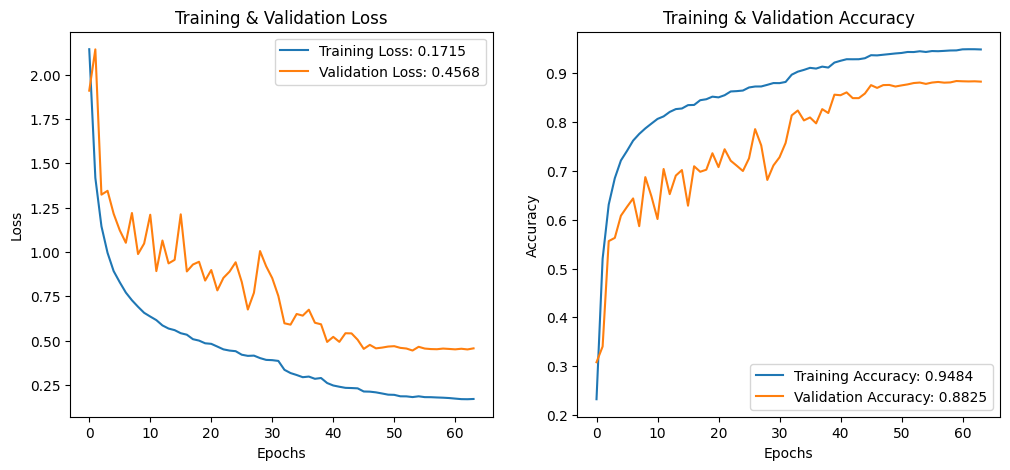

In [ ]:
# Convert training history to DataFrame
hist_df = pd.DataFrame(training_history.history)
hist_df['epoch'] = training_history.epoch

# Plot training history
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(hist_df['epoch'], hist_df['loss'], label=f'Training Loss: {hist_df["loss"].iloc[-1]:.4f}')
plt.plot(hist_df['epoch'], hist_df['val_loss'], label=f'Validation Loss: {hist_df["val_loss"].iloc[-1]:.4f}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(hist_df['epoch'], hist_df['accuracy'], label=f'Training Accuracy: {hist_df["accuracy"].iloc[-1]:.4f}')
plt.plot(hist_df['epoch'], hist_df['val_accuracy'], label=f'Validation Accuracy: {hist_df["val_accuracy"].iloc[-1]:.4f}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

**Confusion Matrix**

563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1814
           1       0.87      0.89      0.88      1828
           2       0.91      0.89      0.90      1803
           3       0.85      0.83      0.84      1719
           4       0.88      0.92      0.90      1812
           5       0.85      0.87      0.86      1768
           6       0.88      0.87      0.88      1832
           7       0.92      0.90      0.91      1808
           8       0.86      0.85      0.86      1812
           9       0.88      0.86      0.87      1804

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



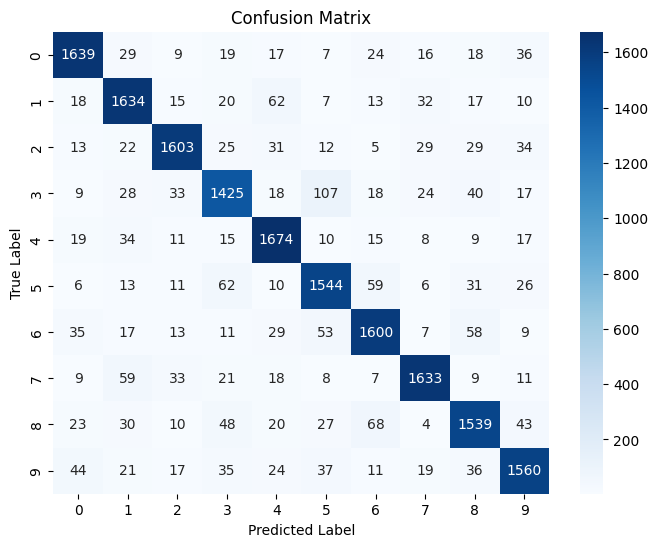

In [ ]:
# Predict class labels
Y_pred = model.predict(X_test_np)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test_cat, axis=1)

# Classification report
print("Classification Report:\n", classification_report(Y_true_classes, Y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_true_classes, Y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Observations**
1. **High Overall Accuracy:** 88.25% validation accuracy indicates that the model is making correct predictions the vast majority of the time. This is a great result!

2. **Strong Training Performance:** 94.8% training accuracy shows that the model has learned the dataset effectively.

3. **Well-Balanced Precision & Recall:** The macro average of 0.88 suggests that the model maintains a consistent balance across all classes.

4. **Strong Class Performance**

Class 0, 2, 4, and 7 have the highest F1-scores (≥ 0.90), indicating excellent recognition accuracy.

Class 1, 6, and 9 are also strong (≈ 0.87 - 0.89), showing a very reliable prediction ability.

5. **Balanced Classification**

The support values (sample count per class) are fairly even, meaning no significant bias in classification.

The weighted average precision, recall, and F1-score are all 0.88, indicating consistent performance across all categories.

6. **Low Overfitting**

The training-validation accuracy gap is only ~6%, which is manageable and shows good generalization.

The Validation Accuracy curve has stabilized, meaning the model is no longer fluctuating wildly.